In [1]:
import pandas as pd

In [2]:
cd Downloads

/Users/richard/Downloads


In [3]:
df = pd.read_csv('heart.csv')
# https://www.kaggle.com/fedesoriano/heart-failure-prediction

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [6]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [7]:
len(df)

918

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knc = KNeighborsClassifier(15)

In [10]:
X = pd.get_dummies(df.drop('HeartDisease',axis=1),drop_first=True)
y = df['HeartDisease']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=101)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
X_train = scaler.fit_transform(X_train)

In [16]:
X_test = scaler.transform(X_test)

In [17]:
knc.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [18]:
preds = knc.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [20]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.83      0.91         6

    accuracy                           0.90        10
   macro avg       0.90      0.92      0.90        10
weighted avg       0.92      0.90      0.90        10



In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rfc = RandomForestClassifier(1)

In [23]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1)

In [24]:
preds = rfc.predict(X_test)

In [25]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.83      0.91         6

    accuracy                           0.90        10
   macro avg       0.90      0.92      0.90        10
weighted avg       0.92      0.90      0.90        10



In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr = LogisticRegression()

In [28]:
lr.fit(X_train,y_train)

LogisticRegression()

In [29]:
preds = lr.predict(X_test)

In [30]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.83      0.91         6

    accuracy                           0.90        10
   macro avg       0.90      0.92      0.90        10
weighted avg       0.92      0.90      0.90        10



In [31]:
from sklearn.linear_model import LogisticRegressionCV

In [32]:
lrc = LogisticRegressionCV(Cs=20)

In [33]:
lrc.fit(X_train,y_train)

LogisticRegressionCV(Cs=20)

In [34]:
preds = lrc.predict(X_test)

In [35]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.83      0.91         6

    accuracy                           0.90        10
   macro avg       0.90      0.92      0.90        10
weighted avg       0.92      0.90      0.90        10



In [36]:
from sklearn.svm import SVC

In [37]:
svc = SVC(C=0.01)

In [38]:
svc.fit(X_train,y_train)

SVC(C=0.01)

In [39]:
preds = svc.predict(X_test)

In [40]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.83      0.91         6

    accuracy                           0.90        10
   macro avg       0.90      0.92      0.90        10
weighted avg       0.92      0.90      0.90        10



In [41]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

In [42]:
model = Sequential()
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
es = EarlyStopping(patience=5)

In [45]:
model.fit(X_train,y_train,epochs=200,callbacks=es,validation_data=(X_test,y_test))

Epoch 1/200
29/29 [==============================] - 1s 7ms/step - loss: 0.5718 - accuracy: 0.6861 - val_loss: 0.3694 - val_accuracy: 0.9000
Epoch 2/200
29/29 [==============================] - 0s 2ms/step - loss: 0.3888 - accuracy: 0.8502 - val_loss: 0.2570 - val_accuracy: 0.9000
Epoch 3/200
29/29 [==============================] - 0s 2ms/step - loss: 0.3823 - accuracy: 0.8513 - val_loss: 0.2839 - val_accuracy: 0.9000
Epoch 4/200
29/29 [==============================] - 0s 2ms/step - loss: 0.3571 - accuracy: 0.8623 - val_loss: 0.2515 - val_accuracy: 0.9000
Epoch 5/200
29/29 [==============================] - 0s 2ms/step - loss: 0.3477 - accuracy: 0.8590 - val_loss: 0.2678 - val_accuracy: 0.9000
Epoch 6/200
29/29 [==============================] - 0s 2ms/step - loss: 0.3544 - accuracy: 0.8700 - val_loss: 0.2348 - val_accuracy: 0.9000
Epoch 7/200
29/29 [==============================] - 0s 2ms/step - loss: 0.3417 - accuracy: 0.8689 - val_loss: 0.2549 - val_accuracy: 0.9000
Epoch 8/200
2

<AxesSubplot:>

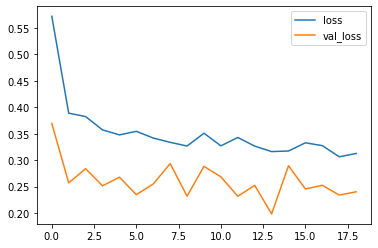

In [46]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot()

<AxesSubplot:>

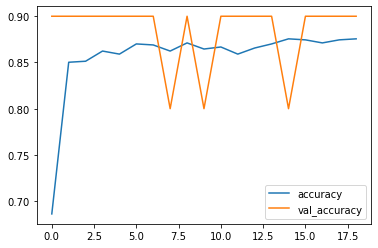

In [47]:
pd.DataFrame(model.history.history)[['accuracy','val_accuracy']].plot()

In [48]:
preds = model.predict(X_test) >= 0.5

In [49]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.83      0.91         6

    accuracy                           0.90        10
   macro avg       0.90      0.92      0.90        10
weighted avg       0.92      0.90      0.90        10

